# Importing libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

# Checkout data

In [28]:
df = pd.read_csv('Logistic_Regression_Binary_Classsification_Churn_Data.csv')
df.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [29]:
df.keys()

Index(['customerID', 'tenure', 'PhoneService', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

# Data cleaning/preprocessing

In [6]:
churn_dummies = pd.get_dummies(df['Churn'],drop_first=True)
Phone_dummies = pd.get_dummies(df['PhoneService'],drop_first=True)
cont_dummies = pd.get_dummies(df['Contract'],drop_first=True)
paper_dummies = pd.get_dummies(df['PaperlessBilling'],drop_first=True)
pay_dummies = pd.get_dummies(df['PaymentMethod'],drop_first=True)

In [7]:
df1 = pd.concat([df.tenure,churn_dummies,paper_dummies,cont_dummies,paper_dummies,pay_dummies,df.MonthlyCharges,df.TotalCharges],axis=1)
df1.head()

,tenure,Yes,Yes,One year,Two year,Yes,Credit card (automatic),Electronic check,Mailed check,MonthlyCharges,TotalCharges
0,1,0,1,0,0,1,0,1,0,29.85,29.85
1,34,0,0,1,0,0,0,0,1,56.95,1889.5
2,2,1,1,0,0,1,0,0,1,53.85,108.15
3,45,0,0,1,0,0,0,0,0,42.30,1840.75
4,2,1,1,0,0,1,0,1,0,70.70,151.65


# Creating X and Y arrays

In [11]:
X = df1.iloc[:,[0,2,3,4,5,6,7,8,9,]].values
y = df1.iloc[:,1].values

# Creating train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=33)

# Creating and training our model

In [13]:
lr = LogisticRegression()

In [14]:
lr.fit(X_train,y_train)

C:\Users\tirum\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

# Model evaluation

In [17]:
confusion_matrix(y_test,y_pred)

array([[923, 103],
       [195, 188]], dtype=int64)

In [18]:
precision_score(y_test,y_pred)

0.6460481099656358

In [19]:
recall_score(y_test,y_pred)

0.4908616187989556

In [20]:
f1_score(y_test,y_pred)

0.5578635014836796

# Prediction from our model

In [32]:
y_pred = lr.predict(X_test)
y_pred

array([1, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [21]:
from sklearn.metrics import classification_report

In [22]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1026
           1       0.65      0.49      0.56       383

    accuracy                           0.79      1409
   macro avg       0.74      0.70      0.71      1409
weighted avg       0.78      0.79      0.78      1409



In [37]:
from sklearn.metrics import roc_curve

In [43]:
y_pred_prob = lr.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

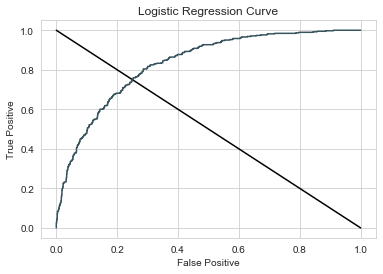

In [44]:
plt.plot([0, 1], [1, 0], 'k')
plt.plot(fpr, tpr, label='Logitic Regression')
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.title('Logistic Regression Curve')
plt.show()